<img src='00_PowerPH_Header.png'>

# POWER $^{PH}$: PREDICTING ELECTRICITY DEMAND OF THE PHILIPPINES USING NEURAL NETWORK MODELS

**Learning Team 2:**<br>
Marvin Belina, Kris Gerald Del Norte, Ray Franco Rivera. Ren Christian Santos

# Abstract

Predicting energy demand is crucial for power supply planning and policy making. In this study, we aim to use Neural Network Models to do energy demand prediction to supplement traditional forecasting models, such as ARIMA and SARIMA, which have been used for decades.

Using $6.5$ years of hourly demand data from the National Grid Corporation of the Philippines (NGCP), we explore three different neural network models: (1) Feedforward Neural Networks, (2) Long Short-Term Memory (LSTM), and (3) Gated Recurrent Units (GRU). Each model is tested on three different lookbacks: $3$ days, $3$ weeks, and $3$ months.

The results show that LSTM with a lookback of $3$ weeks gives the most accurate prediction with a validation loss of $0.0062$. This means that given a mean hourly demand of $8,912 MW$, the model can give a forecast that is accurate within $55 MW$.

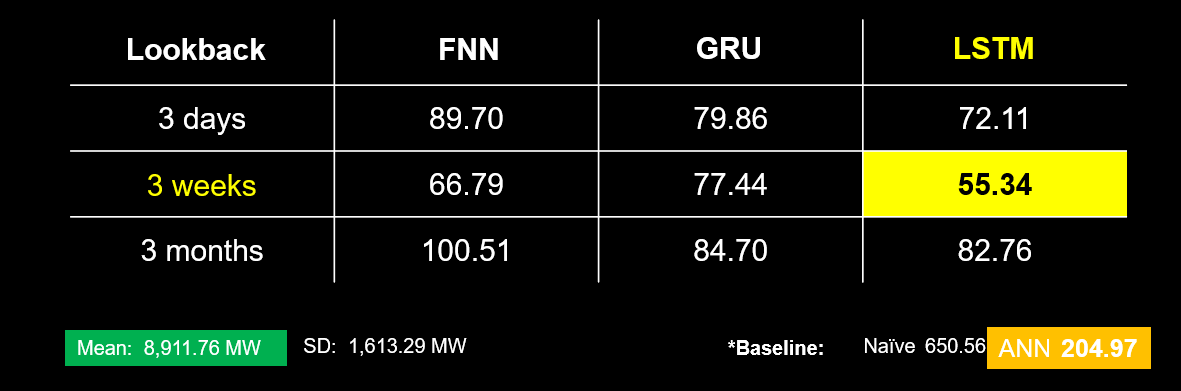

# Introduction

Over the last several decades, power demand in the Philippines has been increasing steadily. For the past 6 and a half years alone, this growth is at a rate of around 5-6% annually and is expected to grow even more quickly in the years and decades to follow. This is a good indicator of the country’s continuously growing economy; however, if the commensurate power demand that comes along with this will not be satisfied, this economic improvement may not be sustainable in long run.

This study responds well to this need. In this paper, we explore three different neural network (NN) models to predict electricity demand of the Philippines. The latest study we have found that does the same for the Philippine setting dates as far back as 1996. 

Acknowledging its translation into cost savings, R. Dellota, in his paper *Short-Term Load Forecasting of the National Power Corporation [Napocor] and the MERALCO Power Systems Using Artificial Neural Networks*, worked on predicting the hourly loads of the two utility companies a few hours to a few weeks in advance. He trained and tested an artificial neural network (ANN) model on two years’ worth of historical load and weather data separately for each company. Additionally, he forecasted the daily peak load of MERALCO one day in advance. The forecast errors achieved, in comparison to what the companies were using, can be considered robust at that time – 2.33% for the Napocor forecast, 2.31% for the MERALCO forecast, and 1.98% for the MERALCO peak load forecast.

As electricity all demand hugely increased since 1996, businesses and households alike call for more reliable power supply. Hence, energy and utility companies call for a more accurate and robust prediction.
With the increased computing power now available, new and more powerful forecasting models have been developed. These models can capture longer periods of historical data, accommodate more features and perform predictions in a much shorter time.

For problems requiring time series analyses, the Long Short-Term Memory (LSTM) model emerged to be one the best in terms of forecasting performance. LSTM is a type of recurrent neural network (RNN) that is especially effective in these cases as it addresses the long-term dependency problem that the standard RNN usually encounters. With this, LSTM finds many applications across varied areas of research and industries, including energy.

In 2018, Salman et al. built an adaptive statistical model for forecasting univariate weather variable. They also explored the effect of intermediate variables to prediction accuracy when using a one-layer versus a multi-layer LSTM. The latter provided a higher accuracy, with pressure as the best intermediate variable. In 2019, Xiao et al. used an LSTM-Adaboost combination approach to predict short and mid-term sea surface temperature (SST), which outperformed five other models in the same space. In the same year, Ni et al. explored two LSTM-based models – wavelet-LSTM (WLSTM) and convolutional LSTM (CLSTM) – for streamflow and rainfall forecasting and compared them with multi-layer perceptron (MLP) and the standard LSTM. LSTM still emerged an effective time series model and the two models tested both present superior alternatives.

In this study, we explore how LSTM, along with two other neural network models – Feedforward Neural Network and Gated Recurrent Unit (GRU), will perform when applied to Philippine power demand data. A sensitivity analysis on different lookback periods are also conducted to identify the best model and hyperparameters that will provide the highest forecasting performance.

<img src="01_NGCP.JPG" />

# Data, Methods and Models

## Data and Preprocessing

Data has been obtained from the official website of the National Grid Corporation of the Philippines (NGCP). The NGCP is a  privately-owned corporation in charge of operating, maintaining, and developing the country's state-owned power grid. The hourly demand data can be accessed <a href='https://www.ngcp.ph/operations#operations'>here</a>.

The file has three separate sheets for the Luzon, Visayas, and Mindanao grids. Each sheet contains 6.5 years (2,372 days) of hourly demand (in megawatts) for the whole 24 hours. The demand values for each grid were aggregated to come up with the energy demand of the whole country.

The features to be fed in the different neural network models are the different lookbacks of 3 days, 3 weeks, and 3 months. The preprocessing code is shown in the GRU part.

The plot below shows the all the hourly demand data as a time series. Notice the general increasing trend over time, reflecting seasonality of one year.

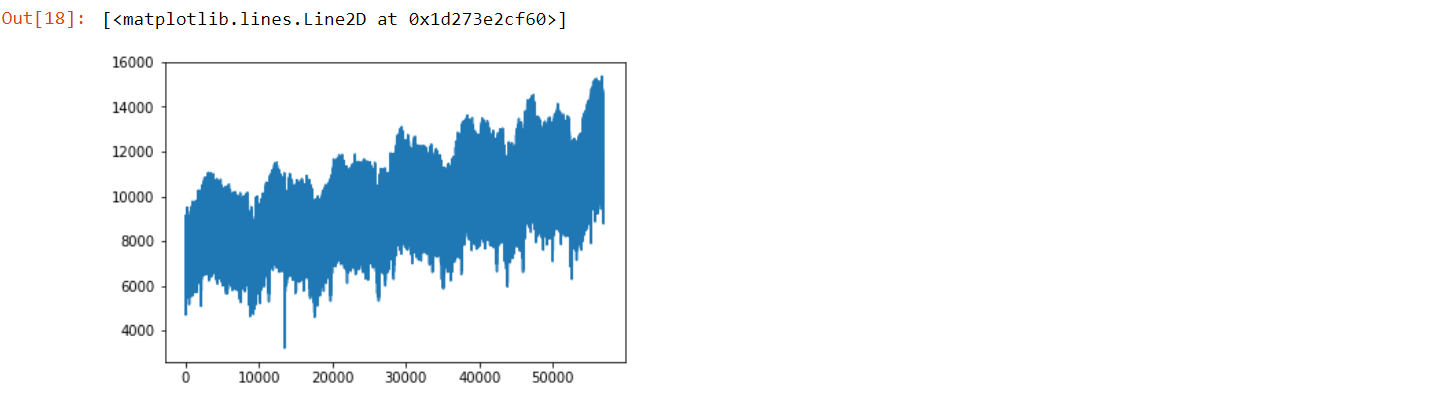

### Data Transformation

In order to fit the data for neural network architecture, the time-series data were transformed so that the historical data with specific timesteps are used as predictors of the values for the current timestep (target). The transformation should be applied to the original feature (column).

<img src="02_data_xform.JPG" />

## Neural Network Models
We used 3 different Neural Network Models. In this notebook, only a part of GRU is shown since we used multiple notebooks and machines to run different models and parameters.

## Feedforward Neural Networks
Feedforward Neural Networks (FNN) are artificial neural networks wherein connections between the nodes do not form a cycle. (https://arxiv.org/pdf/1404.7828.pdf).

The number of parameters is dependent on the lookback. Below is an image of the model summary for what we used for the 3-week lookback.

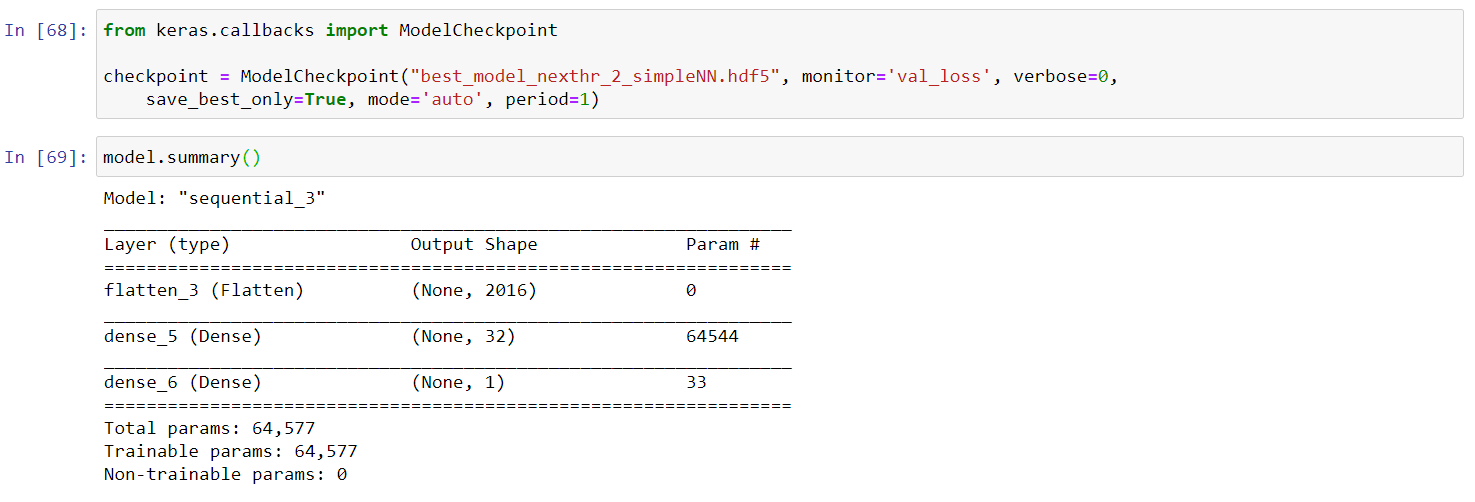

## Long Short-Term Memory
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell. LSTM was introduced to overcome the vanishing gradient problem. (Long Short-Term Memory, S. Hochreiter and J. Schmidhuber, Neural Computation, 9(8): 1735-1780, 1997)

The image below is from Notebook 4 of Prof. Monterola's Machine Learning 2.0 Class.

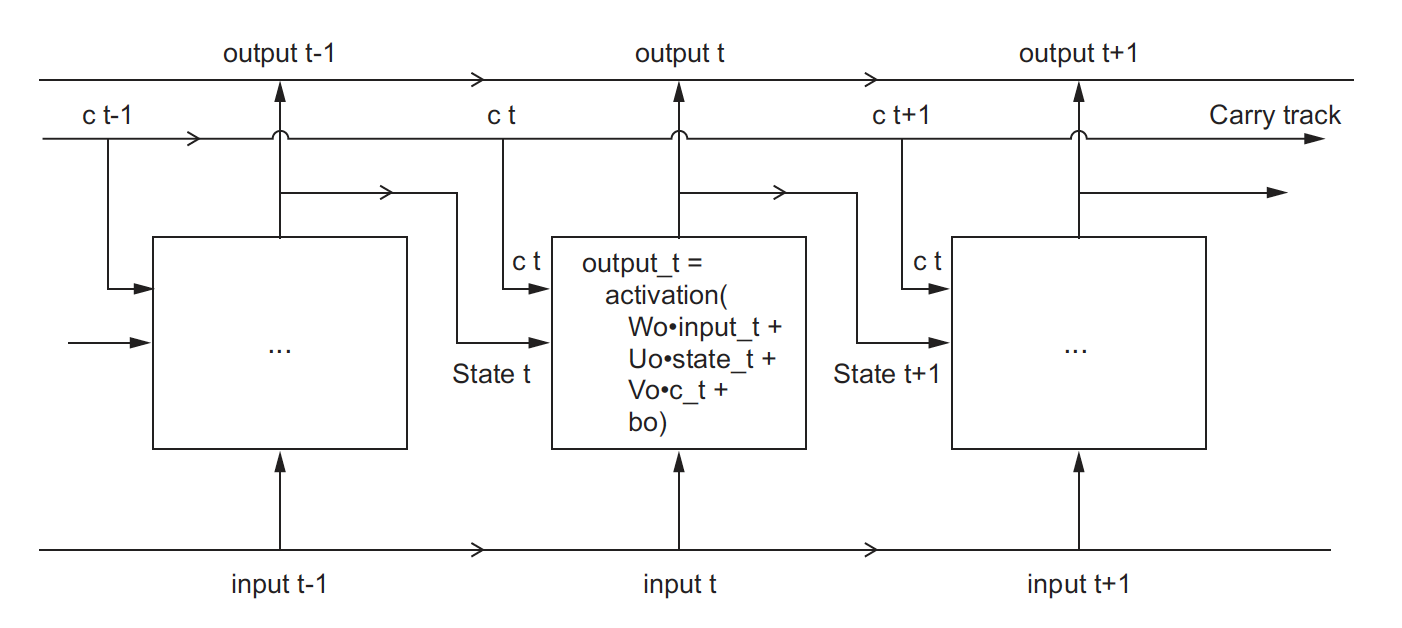

The image below is the model summary for the LSTM with 3-week lookback. 

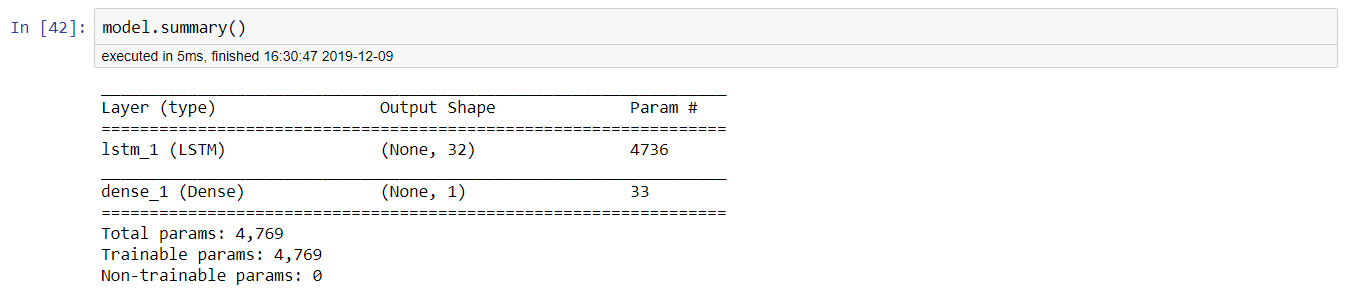

## Gated Recurrent Units
Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory (LSTM), but has fewer parameters since it lacks an output gate. https://arxiv.org/pdf/1412.3555v1.pdf

The next couple of cells are the actual codes used for preprocessing and GRU test with a sample lookback of 3 hours.

## Forecasting Scenarios

In the simulation, four (4) forecasting scenarios were implemented to forecast the next hour power demand. These are the following: 3-hour lookback, 3-day lookback, 3-week lookback and 3-month lookback. For each scenario, as mentioned in data transformation sections, the features will be different (increasing linearly with the no. of lookback datapoints). Three (3) original features were also used in the model as these will be able to explain the seasonality, trend and bias of data.

<img src="03_forecasting_scenarios_PH.JPG" />

## Parameters:

In [1]:
steps_per_epoch = 1000
epochs = 25
validation_steps = 100

model_checkpoint_file = "GDN_RNN_S1000_E25_V100.hdf5"  # rename accordingly

### Extraction of Data

In [2]:
import os
fname = 'Hourly Demand_201301-201906_PH.csv'
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['DATE', 'YEAR', 'MONTH', 'WEEKDAY', ' HR ', 'PH']
56929


In [3]:
selected_columns = ['MONTH', 'WEEKDAY', ' HR ', 'PH']

In [4]:
import pandas as pd

data2 = pd.read_csv('Hourly Demand_201301-201906_PH.csv',
                    usecols=selected_columns)

In [5]:
selected_columns = ['DUMMY_TO_DELETE', 'MONTH', 'WEEKDAY', ' HR ', 'PH']

In [6]:
data2['DUMMY_TO_DELETE'] = 15

In [7]:
data2.head()

,MONTH,WEEKDAY,HR,PH,DUMMY_TO_DELETE
0,1,2,1,6331,15
1,1,2,2,5702,15
2,1,2,3,5373,15
3,1,2,4,5121,15
4,1,2,5,5029,15


In [8]:
data2 = data2[selected_columns]

In [9]:
data2.head()

,DUMMY_TO_DELETE,MONTH,WEEKDAY,HR,PH
0,15,1,2,1,6331
1,15,1,2,2,5702
2,15,1,2,3,5373
3,15,1,2,4,5121
4,15,1,2,5,5029


In [10]:
dummy = data2
dummy.head()

,DUMMY_TO_DELETE,MONTH,WEEKDAY,HR,PH
0,15,1,2,1,6331
1,15,1,2,2,5702
2,15,1,2,3,5373
3,15,1,2,4,5121
4,15,1,2,5,5029


In [11]:
data2.to_csv("Hourly Demand_201301-201906_ALL_PH_MOD.csv", index=False)

In [12]:
import os
fname = 'Hourly Demand_201301-201906_ALL_PH_MOD.csv'
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:len(lines)-1]
print(header)
print(len(lines))
# print(lines)

['DUMMY_TO_DELETE', 'MONTH', 'WEEKDAY', ' HR ', 'PH']
56928


In [13]:
import pandas as pd

data2 = pd.read_csv('Hourly Demand_201301-201906_ALL_PH_MOD.csv',
                    usecols=selected_columns)
dummy = data2
dummy.head()

,DUMMY_TO_DELETE,MONTH,WEEKDAY,HR,PH
0,15,1,2,1,6331
1,15,1,2,2,5702
2,15,1,2,3,5373
3,15,1,2,4,5121
4,15,1,2,5,5029


In [14]:
len(lines), len(header)

(56928, 5)

In [15]:
import numpy as np

float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [16]:
dummy.describe()

,DUMMY_TO_DELETE,MONTH,WEEKDAY,HR,PH
count,56928.0,56928.000000,56928.000000,56928.000000,56928.000000
mean,15.0,6.293845,4.001265,12.500000,9476.398029
std,0.0,3.442168,1.999490,6.922247,1855.469031
min,15.0,1.000000,1.000000,1.000000,3209.000000
25%,15.0,3.000000,2.000000,6.750000,8096.000000
50%,15.0,6.000000,4.000000,12.500000,9401.000000
75%,15.0,9.000000,6.000000,18.250000,10773.000000
max,15.0,12.000000,7.000000,24.000000,15369.000000


In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

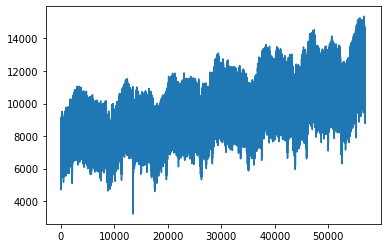

In [18]:
temp = dummy["PH"]
plt.plot(range(len(temp)), temp)

In [19]:
NN_data = float_data

### Split into 70% Train set, 15% Validation set and 15% Test Set

In [20]:
train_count = int(len(NN_data)*.7)
validate_count = int((len(NN_data)-train_count)*0.5)
test_count = len(NN_data)-train_count-validate_count

train_count, validate_count, test_count

(39849, 8539, 8540)

In [21]:
mean = NN_data[:train_count].mean(axis=0)
NN_data -= mean
std = NN_data[:train_count].std(axis=0)
NN_data /= std

In [22]:
NN_data

array([[-1.52188013, -0.9993697 , -1.6610214 , -1.59968355],
       [-1.52188013, -0.9993697 , -1.51656348, -1.98956918],
       [-1.52188013, -0.9993697 , -1.37210556, -2.19349982],
       ...,
       [-0.0584152 ,  1.5008427 ,  1.37259495,  1.4896487 ],
       [-0.0584152 ,  1.5008427 ,  1.51705287,  1.08860577],
       [-0.0584152 ,  1.5008427 ,  1.66151079,  0.73715083]])

In [23]:
mean, std

(array([6.19957841e+00, 3.99856960e+00, 1.24983061e+01, 8.91175927e+03]),
 array([   3.41654924,    1.99983009,    6.92243105, 1613.29361826]))

In [24]:
dummy.columns

Index(['DUMMY_TO_DELETE', 'MONTH', 'WEEKDAY', ' HR ', 'PH'], dtype='object')

In [25]:
len(dummy.columns)

5

In [26]:
target_column = len(dummy.columns)-2

### Transformation of Data

In [27]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, 
              batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][target_column]
        yield samples, targets

In [28]:
float_data.shape

(56928, 4)

In [29]:
(float_data[train_count + validate_count + 1],
 float_data[train_count + validate_count + 1][target_column])

(array([ 0.23427779, -0.9993697 , -0.93873179,  0.19168286]),
 0.19168285938147817)

In [30]:
len(NN_data)

56928

In [31]:
train_count, validate_count, test_count

(39849, 8539, 8540)

#### Set Time Series Data - 3 hours historical (Sample)

In [32]:
lookback = 3  # no. of hours to use to forecast next hour
step = 1  # 1 for 1 hour, 24 for 1 day, etc.
delay = 1  # no. of hour(s) ahead to forecast
batch_size = 64  # no. of records per epoch, 
# each record contains "lookback" hours of input and "delay" hours of output,
# 2^n batch_size, i.e. 2,4,8,16

#### Generate (Transform/Pivot) Data

In [33]:
train_gen = generator(NN_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=train_count,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(NN_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=train_count+1,
                    max_index=train_count+validate_count,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(NN_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=train_count+validate_count+1,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# How many steps to draw from val_gen
# in order to see the entire validation set
val_steps = (validate_count - 1 - lookback)

# How many steps to draw from test_gen in order to see the
# entire test set
test_steps = (test_count - 1 - lookback)

In [34]:
val_steps, test_steps

(8535, 8536)

In [35]:
train_gen, val_gen, test_gen

(<generator object generator at 0x000002426A59A9C8>,
 <generator object generator at 0x000002426A59A948>,
 <generator object generator at 0x000002426A59A748>)

In [36]:
target_column

3

In [37]:
import numpy as np


def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, target_column]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    return np.mean(batch_maes)


naive_mae = evaluate_naive_method()

0.4248809354877904


In [38]:
dummy.columns

Index(['DUMMY_TO_DELETE', 'MONTH', 'WEEKDAY', ' HR ', 'PH'], dtype='object')

In [39]:
naive_mae*std

array([  1.45162664,   0.84968968,   2.94120898, 685.45770174])

In [40]:
float_data = NN_data

In [41]:
float_data[1]

array([-1.52188013, -0.9993697 , -1.51656348, -1.98956918])

In [42]:
std

array([   3.41654924,    1.99983009,    6.92243105, 1613.29361826])

In [43]:
mean

array([6.19957841e+00, 3.99856960e+00, 1.24983061e+01, 8.91175927e+03])

### Model Configuration

In [44]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

Using TensorFlow backend.


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                3552      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(model_checkpoint_file, 
                             monitor='val_loss', 
                             verbose=0,
                             save_best_only=True, 
                             mode='auto', 
                             period=1)

### Load Data and Run Model

In [47]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs,
                              validation_data=val_gen,
                              validation_steps=validation_steps,
                              callbacks=[checkpoint])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/25





1000/1000 [==============================] - 13s 13ms/step - loss: 0.2703 - val_loss: 0.2628
Epoch 2/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2053 - val_loss: 0.2176
Epoch 3/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1739 - val_loss: 0.1880
Epoch 4/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1322 - val_loss: 0.1457
Epoch 5/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1126 - val_loss: 0.1386
Epoch 6/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1051 - val_loss: 0.1327
Epoch 7/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1006 - val_loss: 0.1307
Epoch 8/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0972 - val_loss: 0.1276
Epoch 9/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0

# Results and Discussion

After the simulations run, the best model can be used to forecast future values of power demand. For more efficient visualizations (can be parallelized with model runs), a supplementary notebook is used to visualize the results. 

**Please open the notebook ML2 LT2 Group Project 02 - Supplementary Notebook.ipynb.**

The results for the prediction performance (MAE) for the three models with 3 different lookbacks is shown in the figure below. All variations of the three NN models outperformed the two baselines in terms of mean absolute error (MAE). 

LSTM with a 3-week lookback emerged to have the highest forecast performance at an MAE of 0.62%. This means that given a mean hourly demand of 8,911.76 MW and a standard deviation of $1,613.29 MW$, the model can give a forecast that is accurate within a range of 55 MW from the actual value.

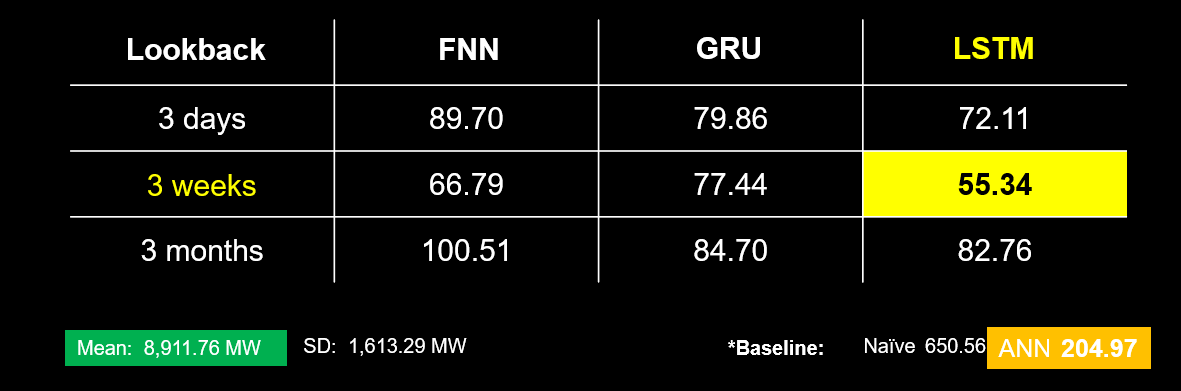

# Conclusion and Recommendations

The study focused on applying neural network models to predict power demand using hourly demand data of the Philippines. All three neural networks explored, combined with three different lookback values, outperformed the baseline neural network models. LSTM with a 3-week lookback showed the highest forecast performance in terms of mean absolute error (MAE).

These models can be trained on more granular data (e.g. per franchise area or station) and is expected to perform at a commensurate accuracy level.

High forecast accuracy on power demand translates to huge business value for utility and power generation companies alike. These forecasts can augment in decision support tools for purchasing electricity and power supply planning, both in the short and the long term. These can also guide decisions on urban planning and policymaking in the energy and adjacent sectors.

The choice of hyperparameters run were limited by the amount of computing resources and corresponding running time. Extensions of this study can explore more lookback values and other hyperparameters to find the optimal architecture. While LSTM is currently seen as the best forecasting model for time series data, other neural network models can still be experimented.


# References
1.	Ronoel Dellota (1996). Short-Term Load Forecasting of the National Power Corporation [Napocor] and the MERALCO Power Systems Using Artificial Neural Networks. *Philippine Engineering Journal XXIV*.
2.	Afan Galih Salman, Yaya Heryadi, Edi Abdurahman and Wayan Suparta (2018). Single Layer & Multi-layer Long Short-Term Memory (LSTM) Model with Intermediate Variables for Weather Forecasting. *Procedia Computer Science 135, 89-98*. doi: 10.1016/j.procs.2018.08.153.
2.	Changjiang Xiao, Nengcheng Chena, Chuli Hu, Ke Wang, Jianya Gong and Zeqiang Chen (2019). Short and mid-term sea surface temperature prediction using time-series satellite data and LSTM-AdaBoost combination approach. *Remote Sensing of Environment*. doi:10.1016/j.rse.2019.111358.
4.	Lingling Ni, Dong Wang, Vijay P. Singh, Jianfeng Wu, Yuankun Wang, Yuwei Tao and Jianyun Zhang (2019). Streamflow and rainfall forecasting by two long short-term memory-based models. *Journal of Hydrology*. doi:10.1016/j.jhydrol.2019.124296.
5.	Hourly [Demand] Data (January 2013 - June 2019). *National Grid Corporation of the Philippines (NGCP) Official Website*. https://www.ngcp.ph/operations#operations.